## Logistic Regression with MNIST

In [1]:
# IMPORTS
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Filter warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
mnist = fetch_openml('mnist_784', as_frame=False)

# Get 'X' and 'y'
X = mnist.data
y = mnist.target

# shapes
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
# Look at the data in 'X' -> instance
random_image = X[10]
y_label = y[10]
print(random_image)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  42. 118. 219.
 166. 118. 118.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 103. 242. 254. 254.
 254. 254. 254.  66.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  18. 232. 254. 254.
 254. 254. 254. 238.  70.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

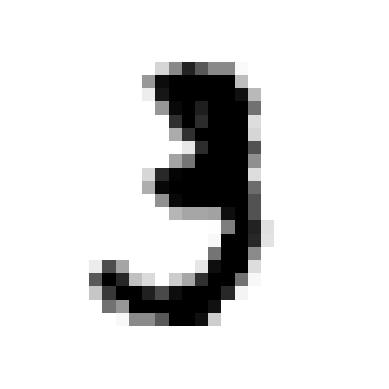

Label: 3


In [5]:
# Display image
def show_image(image):
    image = image.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("Off")

show_image(random_image)
plt.show()
print(f"Label: {y_label}")

In [6]:
# Simple model - baseline
sum_three = sum(random_image)
y_three = (y == '3') # boolean array
results = []

for image in X:
    if sum(image) == sum_three:
        results.append(True)
    else:
        results.append(False)

# Eval the simple model
acc_score = sum(result == label for result, label in zip(results, y_three)) / len(y_three)
scaled_score = acc_score * 100
print(f"Simple Model Score: {scaled_score:.4f}%")

Simple Model Score: 89.8014%


In [7]:
# Get our training and testing datasets
X = X[:45000]
y = y[:45000]
y_3 = (y == '3').astype(int)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_3, test_size=0.2, random_state=42)

In [8]:
# class ---> Logistic Regression
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.1, num_iterations=3000, lambda_=0.01):
        self.learning_rate_ = learning_rate
        self.num_iterations_ = num_iterations
        self.lambda_ = lambda_

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def gradient_descent(self, X, y, W):
        m = len(y)
        for iter in range(self.num_iterations_):
            h = self.sigmoid(X @ W)
            error = h - y
            gradient = X.T @ error / m
            reg_term = (self.lambda_ / m) * W
            reg_term[0] = 0
            W = W - self.learning_rate_ * (gradient + reg_term)
        return W
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.W = np.zeros(X.shape[1])
        self.W = self.gradient_descent(X, y, self.W)
        return self.W
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X @ self.W) >= 0.5

In [9]:
# Test our model
log_reg = LogisticRegressionCustom()
weights = log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

# Eval model
acc_score = accuracy_score(y_test, predictions)
scaled_score = acc_score * 100
print(f"Custom Model Results: {scaled_score:.4f}%")

Custom Model Results: 97.2333%


In [10]:
# Compare
log_reg_sk = LogisticRegression(max_iter=3000, solver='lbfgs', penalty='l2', C=1.0)
log_reg_sk.fit(X_train, y_train)
preds = log_reg_sk.predict(X_test)

# Eval model
acc_score = accuracy_score(y_test, preds)
scaled_score = acc_score * 100
print(f"SK Model Results: {scaled_score:.4f}%")

SK Model Results: 97.0667%


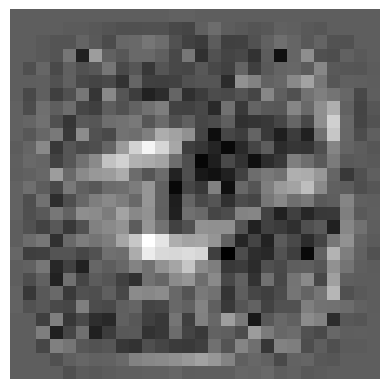

In [11]:
# What does the model think a three is?
weights = weights[1:]
show_image(weights)
plt.show()

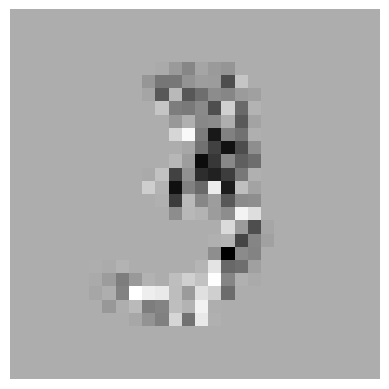

In [12]:
test = X[10] * weights
show_image(test)
plt.show()

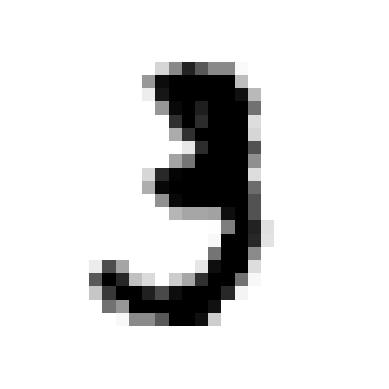

In [13]:
show_image(X[10])
plt.show()